In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18096,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

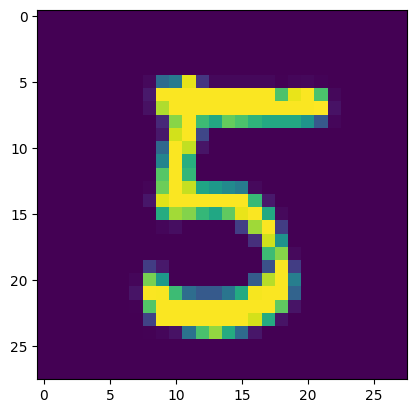

In [6]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[12096,1:].values.reshape(28,28))

In [9]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [11]:
X_train.shape

(33600, 784)

In [12]:
X_test.shape

(8400, 784)

# **Without using any preprocessing**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()- start)

12.971402883529663


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

# **Using Standard Scaler**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Principle Component Analysis(PCA)**

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)

In [34]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf.shape

(33600, 50)

In [23]:
X_test_trf.shape

(8400, 784)

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)
accuracy_score(y_test, y_pred)

0.9528571428571428

# **Check PCA components accuracy for loop**

In [ ]:
for i in range (1, 785):
    pca = PCA(n_components = i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)
    print(accuracy_score(y_test, y_pred))

0.25761904761904764
0.32392857142857145
0.5104761904761905
0.6660714285714285
0.7377380952380952
0.8223809523809524
0.8429761904761904
0.8722619047619048
0.8866666666666667
0.9055952380952381
0.9111904761904762
0.919047619047619
0.9279761904761905
0.9348809523809524
0.9385714285714286
0.9379761904761905
0.9401190476190476
0.9420238095238095
0.9436904761904762
0.9438095238095238
0.9438095238095238
0.944047619047619
0.9453571428571429
0.9447619047619048
0.9479761904761905
0.9477380952380953
0.9476190476190476
0.9478571428571428
0.9492857142857143
0.9489285714285715
0.9516666666666667
0.9522619047619048
0.9497619047619048
0.9496428571428571
0.9510714285714286
0.9507142857142857
0.9522619047619048
0.9523809523809523
0.9526190476190476
0.9521428571428572
0.9528571428571428
0.9527380952380953
0.9517857142857142
0.9539285714285715
0.9539285714285715
0.9528571428571428
0.9528571428571428
0.9536904761904762
0.954047619047619
0.9541666666666667
0.9535714285714286
0.9538095238095238
0.95392857142